In [46]:
# 필요한 라이브러리들 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [47]:
# csv를 읽어와서 Pandas DataFrame으로 저장
data1 = pd.read_csv('../data/2000_2001_hitter.csv')
data2 = pd.read_csv('../data/2002_2013_hitter.csv')
data3 = pd.read_csv('../data/2014hitter.csv')

data1.head()


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,OBP,SLG,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.428023,0.489796,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,0.413729,0.603412,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.398664,0.533333,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,2000송지만,2000,4,송지만,한화,0.338,120,530,468,158,...,0.409434,0.621795,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,2000데이비스,2000,5,데이비스,한화,0.334,107,458,419,140,...,0.367033,0.565632,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


In [48]:
#파일을 합치기
df_combined = pd.concat([data1,data2,data3],ignore_index=True)
df_combined.head()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.976667,100.354529,8.286154,0.400138,92.804,NaN,NaN,NaN,NaN,NaN
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,1.063830,115.473840,9.306847,0.431993,105.000,NaN,NaN,NaN,NaN,NaN
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.931655,86.204956,8.224501,0.400969,77.820,NaN,NaN,NaN,NaN,NaN
3,2000송지만,2000,4,송지만,한화,0.338,120,530,468,158,...,1.110092,119.916981,9.811389,0.436688,107.594,NaN,NaN,NaN,NaN,NaN
4,2000데이비스,2000,5,데이비스,한화,0.334,107,458,419,140,...,0.923588,82.605677,7.125729,0.394586,80.284,NaN,NaN,NaN,NaN,NaN


# 컬럼 추출

['YrPlayer', 'OPS', 'ISO', 'SECA', 'TA', 'RC', 'RC/27', 'wOBA', 'XR']

In [49]:
#컬럼추출
column_to_ext = ['YrPlayer', 'OPS', 'ISO', 'SECA', 'TA', 'RC', 'RC/27', 'wOBA', 'XR']
df_selected = df_combined[column_to_ext]
df_selected.tail()

,YrPlayer,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
644,2014이범호,0.857,0.228571,0.377143,0.884328,64.894286,6.441712,0.369291,63.468
645,2014모창민,0.733,0.150358,0.276850,0.676647,53.028291,4.138046,0.319970,55.644
646,2014오지환,0.767,0.151134,0.355164,0.818182,64.147759,5.463689,0.336344,63.404
647,2014조동화,0.655,0.063205,0.146727,0.539359,48.898621,3.520701,0.293759,48.544
648,2014김재호,0.674,0.073314,0.231672,0.620818,41.969406,3.867488,0.304498,44.468


In [50]:
#추출한  컬럼의 1번~끝까지 X에 넣는다.
X = df_selected.loc[:, column_to_ext[1:]].values
X.shape

(649, 8)

# 스케일링

In [51]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.97614887, -0.07422939,  0.10417649, ...,  1.20484091,
         1.11880719,  1.21433377],
       [ 1.89711625,  1.67989079,  1.05416505, ...,  1.75823146,
         1.89486616,  1.85744936],
       [ 1.10761611,  0.61991005, -0.16048453, ...,  1.1714146 ,
         1.13904003,  0.42420225],
       ...,
       [-0.42233048, -0.05169927,  0.77350431, ..., -0.32541846,
        -0.43538549, -0.33597768],
       [-1.46085838, -1.39601302, -1.62726689, ..., -1.37885116,
        -1.47288829, -1.11957047],
       [-1.28467954, -1.24146838, -0.64887581, ..., -1.19083305,
        -1.21125882, -1.3345048 ]])

# pca

In [52]:
from sklearn.decomposition import PCA
# 전체 주성분 계산
pca = PCA()
principal = pca.fit_transform(X_scaled)


In [53]:
# 컬럼별 설명된 분산 비율 확인
explained = pca.explained_variance_ratio_
explained

array([9.05145728e-01, 5.06261666e-02, 2.18885403e-02, 1.84561022e-02,
       2.99299164e-03, 5.56239341e-04, 1.83919162e-04, 1.50312428e-04])

In [54]:
# 누적분산 확인
cumulative = explained.cumsum()
cumulative

array([0.90514573, 0.95577189, 0.97766044, 0.99611654, 0.99910953,
       0.99966577, 0.99984969, 1.        ])

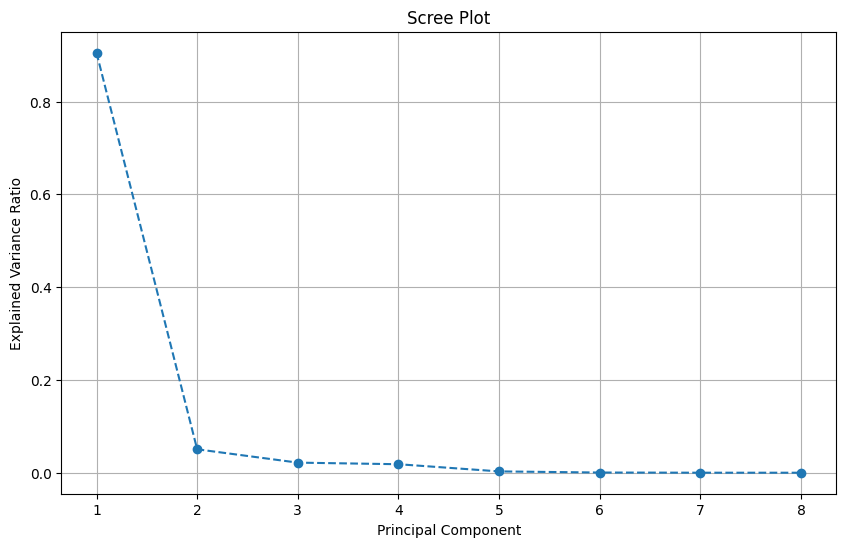

In [55]:
# Plot Scree Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained) + 1), explained, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained) + 1, 1))
plt.grid()
plt.show()

In [56]:
# 최적의 주성분 개수 선택 (예: 90% 이상의 분산을 설명하는 최소 주성분 개수)
optimal_components = next(i for i, total_var in enumerate(cumulative) if total_var >= 0.90) + 1
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 1


# 1단계 2개로 하기

In [57]:
from sklearn.decomposition import PCA

# PCA 수행
# 2개의 주성분으로 변환
pca2 = PCA(n_components=2) 
principal2 = pca2.fit_transform(X_scaled)
principal2

array([[ 2.48864775, -1.29871071],
       [ 4.8638416 , -0.32843484],
       [ 2.05850718, -0.4397998 ],
       ...,
       [-0.3971905 ,  0.69084294],
       [-3.94087277, -0.42488303],
       [-3.33227219,  0.22550401]])

In [58]:
# PCA 설명된 분산 비율 출력
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.05145728e-01, 5.06261666e-02, 2.18885403e-02, 1.84561022e-02,
       2.99299164e-03, 5.56239341e-04, 1.83919162e-04, 1.50312428e-04])

주성분 1(PC1): 데이터의 가장 큰 분산을 설명하는 축 > 90% 설명  
주성분 2(PC2): 두 번째로 큰 분산을 설명하는 축 > 5% 설명

In [59]:
# pc1, pc2로 결과 데이터프레임 생성 
principal_df = pd.DataFrame(data=principal2, columns=['principal 1', 'principal 2'])
principal_df

,principal 1,principal 2
0,2.488648,-1.298711
1,4.863842,-0.328435
2,2.058507,-0.439800
3,5.544865,-0.087107
4,2.134990,0.387255
...,...,...
644,1.024438,1.383975
645,-1.873179,0.821719
646,-0.397191,0.690843
647,-3.940873,-0.424883


In [60]:
# label YrPlayer를 추가하여 최종 데이터프레임 생성
final_df = pd.concat([principal_df, df_selected[['YrPlayer']]], axis=1)
final_df

,principal 1,principal 2,YrPlayer
0,2.488648,-1.298711,2000박종호
1,4.863842,-0.328435,2000김동주
2,2.058507,-0.439800,2000브리또
3,5.544865,-0.087107,2000송지만
4,2.134990,0.387255,2000데이비스
...,...,...,...
644,1.024438,1.383975,2014이범호
645,-1.873179,0.821719,2014모창민
646,-0.397191,0.690843,2014오지환
647,-3.940873,-0.424883,2014조동화


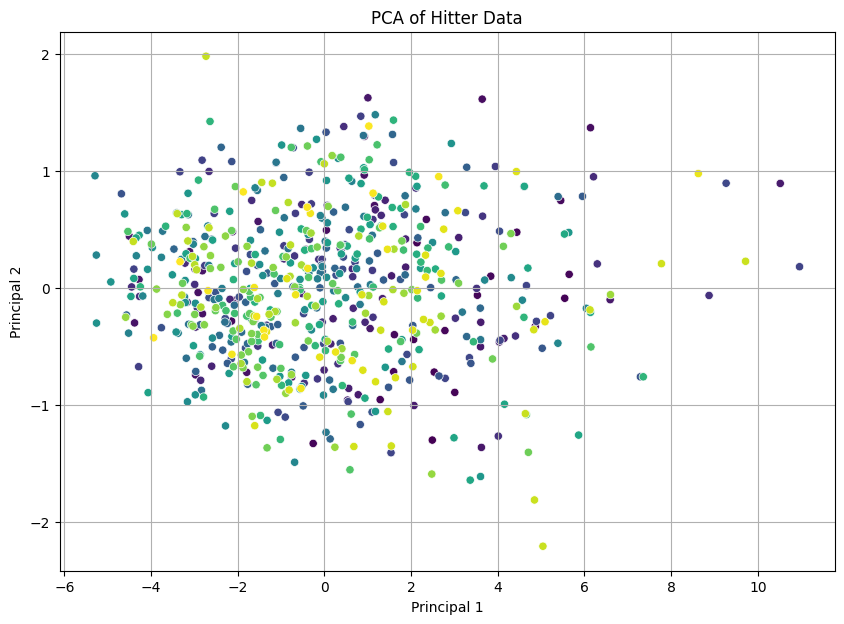

In [61]:
# PCA 결과 시각화
#label이 다수라서 sns의 hue를 이용한다.

plt.figure(figsize=(10, 7))
sns.scatterplot(data=final_df, x='principal 1', y='principal 2', hue='YrPlayer', palette='viridis', legend=False)
plt.title('PCA of Hitter Data')
plt.xlabel('Principal 1')
plt.ylabel('Principal 2')
plt.grid()
plt.show()

# 클러스터링 수행

In [66]:
#yrPlayer 값을 년도와 이름으로 분리
extracted_columns = final_df['YrPlayer'].str.extract(r'(\d{4})(.*)')
extracted_columns


,0,1
0,2000,박종호
1,2000,김동주
2,2000,브리또
3,2000,송지만
4,2000,데이비스
...,...,...
644,2014,이범호
645,2014,모창민
646,2014,오지환
647,2014,조동화


In [67]:
final_df.loc[:, 'Year'] = extracted_columns[0]
final_df.loc[:, 'Player'] = extracted_columns[1]
final_df

,principal 1,principal 2,YrPlayer,Year,Player
0,2.488648,-1.298711,2000박종호,2000,박종호
1,4.863842,-0.328435,2000김동주,2000,김동주
2,2.058507,-0.439800,2000브리또,2000,브리또
3,5.544865,-0.087107,2000송지만,2000,송지만
4,2.134990,0.387255,2000데이비스,2000,데이비스
...,...,...,...,...,...
644,1.024438,1.383975,2014이범호,2014,이범호
645,-1.873179,0.821719,2014모창민,2014,모창민
646,-0.397191,0.690843,2014오지환,2014,오지환
647,-3.940873,-0.424883,2014조동화,2014,조동화


2014 데이터를 분리해서 테스트

In [68]:
#군집 모델 훈련용 2014 이전 데이터 추출 Year<! 는 군집
df_base = final_df.loc[final_df['Year']!='2014']
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 593
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   principal 1  594 non-null    float64
 1   principal 2  594 non-null    float64
 2   YrPlayer     594 non-null    object 
 3   Year         594 non-null    object 
 4   Player       594 non-null    object 
dtypes: float64(2), object(3)
memory usage: 27.8+ KB


In [69]:
#테스트용 2014년 데이터 추출
df_2014 = final_df.loc[final_df['Year']=='2014']
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 594 to 648
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   principal 1  55 non-null     float64
 1   principal 2  55 non-null     float64
 2   YrPlayer     55 non-null     object 
 3   Year         55 non-null     object 
 4   Player       55 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.6+ KB


# 엘보우기법으로 k값 결정

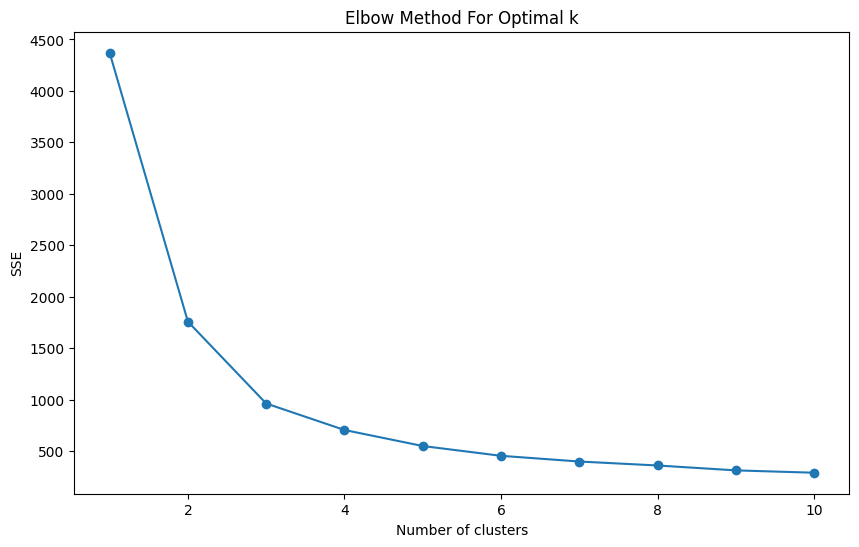

In [71]:
# 이전 데이터로 K-means 클러스터링 수행
X = df_base[['principal 1', 'principal 2']]

from sklearn.cluster import KMeans

# 1~10까지 10번 kmeans 돌려서, 각각의 엘보우 방법을 사용하여 적절한 클러스터 수 찾기
#SSE(Sum of Squared Errors, 제곱합 오차)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# K-means 클러스터링 (클러스터 수를 3으로 가정)


/tmp/ipykernel_33278/2275353359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['Cluster'] = kmeans.fit_predict(X)


,principal component 1,principal component 2,Year,Player,Cluster
0,2.488648,-1.298711,2000,박종호,1
1,4.863842,-0.328435,2000,김동주,1
2,2.058507,-0.439800,2000,브리또,2
3,5.544865,-0.087107,2000,송지만,1
4,2.134990,0.387255,2000,데이비스,2


In [ ]:
#클러스터별 선수의 분포


Cluster
2    255
0    246
1     93
Name: count, dtype: int64

In [ ]:
#첫번째 클러스터의 선수들


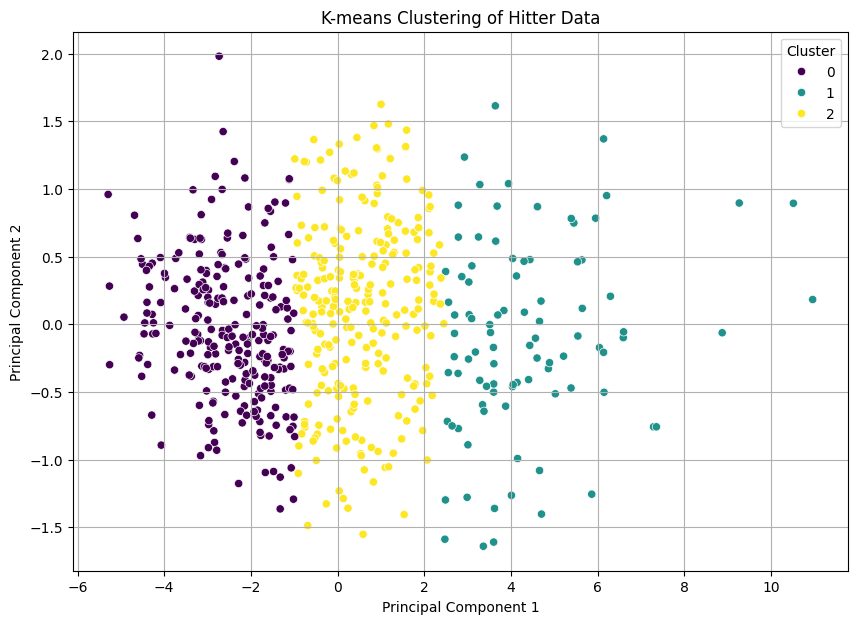

In [ ]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_base, x='principal component 1', y='principal component 2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-means Clustering of Hitter Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 2014 데이터로 클러스터링

In [ ]:
df_2014.info()


<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 594 to 648
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  55 non-null     float64
 1   principal component 2  55 non-null     float64
 2   Year                   55 non-null     object 
 3   Player                 55 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.1+ KB


In [ ]:
# 특징 데이터 추출 및 표준화


,principal component 1,principal component 2
594,5.041371,-2.205559
595,4.635652,-1.072903
596,4.845792,-1.810337
597,9.716724,0.228912
598,6.127514,-0.186289


In [ ]:
# 2014 데이터에 대한 클러스터 예측


/tmp/ipykernel_33278/4076657880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Cluster'] = kmeans.predict(X_new)


,principal component 1,principal component 2,Year,Player,Cluster
594,5.041371,-2.205559,2014,서건창,1
595,4.635652,-1.072903,2014,김태균,1
596,4.845792,-1.810337,2014,손아섭,1
597,9.716724,0.228912,2014,강정호,1
598,6.127514,-0.186289,2014,최형우,1


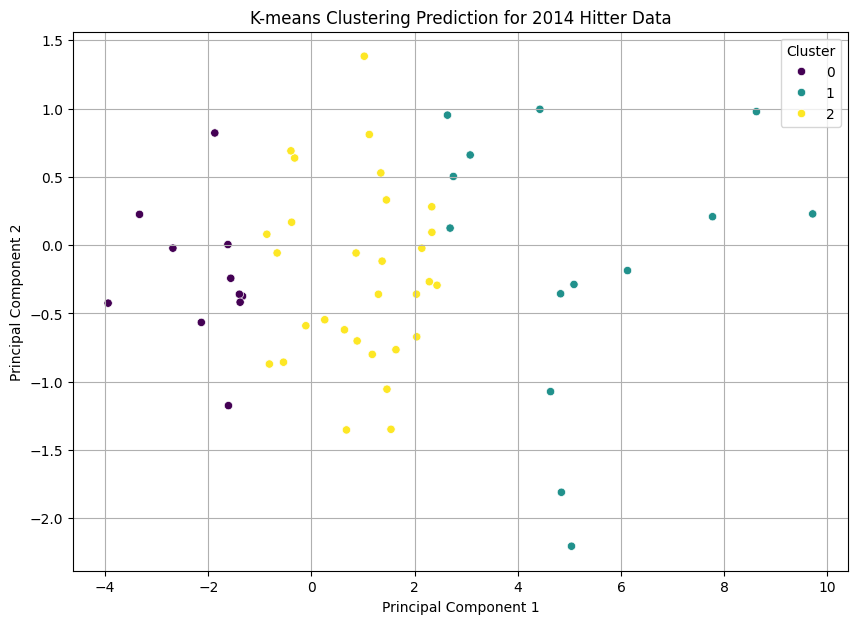

In [ ]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_2014, x='principal component 1', y='principal component 2', hue='Cluster', palette='viridis', legend='full')
plt.title('K-means Clustering Prediction for 2014 Hitter Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [ ]:
# 2014 이전과  이후 비교

In [ ]:
# 클러스터 개수 확인

# 클러스터 개수 합치기


,Base Cluster Counts,2014 Cluster Counts
Cluster,,
2,255,30
0,246,11
1,93,14


In [ ]:
# 클러스터별 대표적 player 확인 (각 클러스터별 평균에 가장 가까운 선수 선택)


In [ ]:
# 각 클러스터별 대표 선수 출력

# 결과 비교


  Base Representative Player 2014 Representative Player
0                         최정                        나바로
1                        홍세완                        오재원
2                        김종국                        이용규


In [ ]:
# 대표 선수들의 클러스터 비교



In [ ]:
#비교 하려는 대표 선수의 목록


['나바로', '최정', '김종국', '오재원', '이용규', '홍세완']

In [ ]:
#클러스터비교

# 결과를 데이터프레임으로 변환
comparison_df = pd.DataFrame(comparison_clusters, columns=['Player', 'Base Cluster', '2014 Cluster'])



,Player,Base Cluster,2014 Cluster
0,나바로,NaN,1.0
1,최정,0.0,NaN
2,김종국,2.0,NaN
3,오재원,0.0,2.0
4,이용규,0.0,0.0
5,홍세완,0.0,NaN
